<a href="https://colab.research.google.com/github/Neelov12/MAT-421-Computational-Methods-Integrated-into-Python/blob/main/Module_C_19_1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 19.1, 19,2, 19.3, 19.4 19.5

# 19.1: Roots of a function

The roots or zero of a function can be determined by evaluating some $x_r$ of $f(x)$ where $f(x_r) = 0$

Here is a program using the python library 'scipy' to approximate the roots of a generally more difficult equation to approximate:

$$
sin(x) - x^2
$$

In [3]:
import numpy as np
from scipy import optimize

f = lambda x: np.sin(x) - x*x
r = optimize.fsolve(f, 1)
print("r =", r)

# Verify the solution is a root
result = f(r)
print("result=", result)

r = [0.87672622]
result= [0.]


## 19.2: Tolerance

Tolerance is an evaluative measure of approximation, where if an estimate converges to a point at or below a desired level of tolerance, a root can exist. This is often denoted as:
$$
|𝑓(𝑥)|
$$

To demonstrate this concept, I will show that $\frac{1}{x}$ *technically* has a root

Using a tolerance of $2 * 10^{-10}$, $\frac{1}{x}$ has a root at r:

In [4]:
f = lambda x: 1/x

r, infodict, ier, mesg = optimize.fsolve(f, -2, full_output=True)
print("r =", r)

result = f(r)
print("result=", result)

print(mesg)

tol = 2 * (10 ** -10)
if(result < tol):
    print("Successful root approximation at", result)
else:
    print("fail")

r = [-3.52047359e+83]
result= [-2.84052692e-84]
The number of calls to function has reached maxfev = 400.
Successful root approximation at [-2.84052692e-84]


## 19.3: Bisection Method

The Bisection method is a root-finding algorithm that repeatedly applies the Intermediate Value Theorem.  It starts with a continuous function $f(x)$ and an interval $(a, b)$ where $f(a)$ and $f(b)$ have opposite signs (e.g., $f(a) > 0$ and $f(b) < 0$).  The Intermediate Value Theorem guarantees at least one root within this interval.

The method then calculates the midpoint $m = \frac{(a + b)}{2}$.  If $f(m)$ is zero (or very close), then m is a root. Otherwise, the interval is halved. If $f(m)$ has the same sign as $f(a)$, the new interval becomes $(m, b)$. If $f(m)$ has the same sign as $f(b)$, the new interval becomes (a, m). This process is repeated, narrowing the interval until the root is found to the desired accuracy.

The following program approximates the root of
$$
-x^2 + 6
$$
where
$$
0 < x < 4
$$
using the Bisection method

Define the function

In [5]:
# Define the function f(x) = -x^2 + 6
def f(x):
    return -x**2 + 6

Bisection method function

In [6]:
# Bisection method implementation
def bisection_method(a, b, tol=1e-5, max_iter=100):
    iter_count = 0
    while (b - a) / 2 > tol:
        m = (a + b) / 2
        f_m = f(m)

        # Print m and f(m) for every other step
        if iter_count % 2 == 0:
            print(f"Step {iter_count}: m = {m}, f(m) = {f_m}")

        if f_m == 0:  # Root found
            print(f"Exact root found: m = {m}, f(m) = {f_m}")
            return m

        # Update the interval
        if f_m * f(a) < 0:  # Root lies between a and m
            b = m
        else:  # Root lies between m and b
            a = m

        iter_count += 1
        if iter_count >= max_iter:
            print("Max iterations reached.")
            break

    # Return the best approximation to the root
    m = (a + b) / 2
    print(f"Approximate root: m = {m}, f(m) = {f(m)}")
    return m

# Interval [0, 4]
a = 0
b = 4

Call to bisection method for the function, prints every other step of the approximation

In [7]:
# Call the bisection method
root = bisection_method(a, b)

Step 0: m = 2.0, f(m) = 2.0
Step 2: m = 2.5, f(m) = -0.25
Step 4: m = 2.375, f(m) = 0.359375
Step 6: m = 2.46875, f(m) = -0.0947265625
Step 8: m = 2.4453125, f(m) = 0.02044677734375
Step 10: m = 2.451171875, f(m) = -0.008243560791015625
Step 12: m = 2.44970703125, f(m) = -0.0010645389556884766
Step 14: m = 2.4495849609375, f(m) = -0.0004664808511734009
Step 16: m = 2.449493408203125, f(m) = -1.795683056116104e-05
Approximate root: m = 2.4494857788085938, f(m) = 1.9419414456933737e-05


## 19.4: Newton-Raphson Method

The **Newton-Raphson Method** for comuting roots involved selecting an initial estimate for a root of an equation, and computing a new root based on a linear approximation, and iterating the steps until the solution is at or below the tolerance. The equation is given by
<bv>

$$
0=𝑓(𝑥_0)+𝑓′(𝑥_0)(𝑥_1−𝑥_0)
$$
where, when resolved for $x_1$,
$$
𝑥_1=𝑥_0−\frac{𝑓(𝑥_0)}{𝑓′(𝑥_0)}
$$

The following program demonstrates this concept on the equation $f(x) = x^2 - 2$, where the root is the square root of 2

In [9]:
f = lambda x: x**2 - 2
f_prime = lambda x: 2*x
newton_raphson = 1.4 - (f(1.4))/(f_prime(1.4))

print("newton_raphson =", newton_raphson)
print("sqrt(2) =", np.sqrt(2))

newton_raphson = 1.4142857142857144
sqrt(2) = 1.4142135623730951


Taking it a step further, we can use this method to find the root of a more complicated equation, say

$$f(x) = 3x^{4}+2x^{3}+2x^{2}+5x-3$$

First, let's create a function for finding the Newton-Raphson estimate:

In [10]:
def my_newton(f, df, x0, tol):
    # output is an estimation of the root of f
    # using the Newton Raphson method
    # recursive implementation
    if abs(f(x0)) < tol:
        return x0
    else:
        return my_newton(f, df, x0 - f(x0)/df(x0), tol)

Define
$$f(x) = 3x^{4}+2x^{3}+2x^{2}+5x-3$$
$$f'(x) = 12x^{3}+6x^{2}+4x+5$$
in python

In [15]:
f = lambda x: 3*x**4 - 2*x**3 - 2*x**2 + 5*x - 3
f_prime = lambda x: 12*x**3 + 6*x**2 + 4*x + 5

Compute the Newtom-Rapshon estimate

In [12]:
newton_raphson = my_newton(f, f_prime, 1, 1e-6)
print("newton_raphson =", newton_raphson)

newton_raphson = 0.8179427530709084


A plot of the equation shows the calculated root and the true root

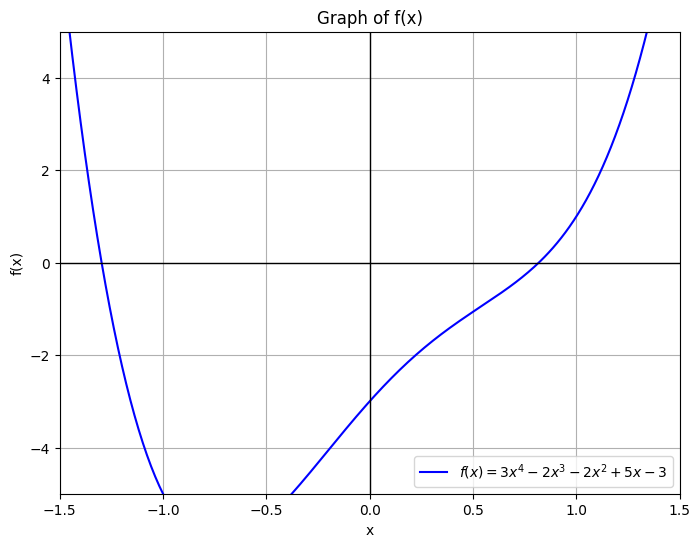

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
f = lambda x: 3*x**4 - 2*x**3 - 2*x**2 + 5*x - 3

# Create an array of x values for plotting
x = np.linspace(-2, 2, 400)

# Calculate the corresponding y values
y = f(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$f(x) = 3x^4 - 2x^3 - 2x^2 + 5x - 3$', color='blue')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.title("Graph of f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")

# Zoom in around the root (adjust as necessary based on root estimates)
plt.xlim(-1.5, 1.5)  # X-axis zoomed in around the root
plt.ylim(-5, 5)      # Y-axis range

# Show grid
plt.grid(True)

# Display the plot
plt.legend()
plt.show()

## 19.5: Root Finding in Python

Python has the existing root-finding functions for us to use to make things easy. The function to find the root is f_solve from the scipy.optimize.

Let's find the root of the equation from the previous section using this method.

$$f(x) = 3x^{4}+2x^{3}+2x^{2}+5x-3$$

Import needed:

In [14]:
from scipy.optimize import fsolve

In [17]:
f = lambda x: 3*x**4 - 2*x**3 - 2*x**2 + 5*x - 3

fsolve(f, [-2, 1])

array([-1.29685762,  0.81794256])

This method computes $0.81794256$, whereas the previous method computes $0.8179427530709084$
Notice that this solution computes both roots instead of the positive one in the previous section.